<a href="https://colab.research.google.com/github/aguscura/UBA-data-science/blob/main/tp1_parte2_original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tennis GrandSlams Winners

In [205]:
# from google.colab import files
# files.upload()

In [206]:
import pandas as pd

df = pd.read_csv("/content/Mens_Tennis_Grand_Slam_Winner.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   YEAR                         289 non-null    int64  
 1   TOURNAMENT                   289 non-null    object 
 2   WINNER                       289 non-null    object 
 3   RUNNER-UP                    289 non-null    object 
 4   WINNER_NATIONALITY           289 non-null    object 
 5   WINNER_ATP_RANKING           61 non-null     float64
 6   RUNNER-UP_ATP_RANKING        61 non-null     float64
 7   WINNER_LEFT_OR_RIGHT_HANDED  289 non-null    object 
 8   TOURNAMENT_SURFACE           289 non-null    object 
 9   WINNER_PRIZE                 214 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 22.7+ KB


In [207]:
df = df[df["YEAR"] >= 2000].sort_values("YEAR").reset_index(drop=True)
df

,YEAR,TOURNAMENT,WINNER,RUNNER-UP,WINNER_NATIONALITY,WINNER_ATP_RANKING,RUNNER-UP_ATP_RANKING,WINNER_LEFT_OR_RIGHT_HANDED,TOURNAMENT_SURFACE,WINNER_PRIZE
0,2000,Australian Open,Andre Agassi,Yevgeny Kafelnikov,American,NaN,NaN,right,Rebound Ace,755000.0
1,2000,U.S. Open,Marat Safin,Pete Sampras,Russian,NaN,NaN,right,DecoTurf - outdoors,800000.0
2,2000,French Open,Gustavo Kuerten,Magnus Norman,Brazilian,NaN,NaN,right,Clay,4240000.0
3,2000,Wimbledon,Pete Sampras,Patrick Rafter,American,NaN,NaN,right,Grass / Outdoor,477500.0
4,2001,Australian Open,Andre Agassi,Arnaud Clement,American,NaN,NaN,right,Rebound Ace,830500.0
...,...,...,...,...,...,...,...,...,...,...
84,2021,French Open,Novak Djokovic,Stefanos Tsitsipas,Serbian,1.0,4.0,right,Clay,1400000.0
85,2021,Wimbledon,Novak Djokovic,Matteo Berrettini,Serbian,1.0,7.0,right,Grass / Outdoor,1700000.0
86,2021,U.S. Open,Daniil Medvedev,Novak Djokovic,Russian,2.0,1.0,right,DecoTurf - outdoors,2500000.0
87,2022,Australian Open,Rafael Nadal,Daniil Medvedev,Spanish,5.0,2.0,left,Plexicushion Prestige,4400000.0


In [208]:
df = df[["YEAR","TOURNAMENT", "WINNER"]]

In [209]:
df.groupby(["TOURNAMENT"]).count()

,YEAR,WINNER
TOURNAMENT,,
Australian Open,23,23
French Open,23,23
U.S. Open,22,22
Wimbledon,21,21


In [210]:
df = df.groupby(["TOURNAMENT", "WINNER"]).count()
df = df.rename(columns={"YEAR": "GRAND SLAMS"})
df.reset_index(inplace=True)
df

,TOURNAMENT,WINNER,GRAND SLAMS
0,Australian Open,Andre Agassi,3
1,Australian Open,Marat Safin,1
2,Australian Open,Novak Djokovic,9
3,Australian Open,Rafael Nadal,2
4,Australian Open,Roger Federer,6
5,Australian Open,Stan Wawrinka,1
6,Australian Open,Thomas Johannson,1
7,French Open,Albert Costa,1
8,French Open,Gaston Gaudio,1
9,French Open,Gustavo Kuerten,2


In [211]:
plt.rcParams["figure.figsize"] = [22,14]
plt.figure(dpi=200)

<Figure size 4400x2800 with 0 Axes>

<Figure size 4400x2800 with 0 Axes>

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt

# df.plot(kind='bar', stacked=True, x = index,  color=[ "#00a5cf",  "#e5383b"])



rafa = df[df["WINNER"]=="Rafael Nadal"]
roger = df[df["WINNER"]=="Roger Federer"]
novak = df[df["WINNER"]=="Novak Djokovic"]
fedal = df[  df["WINNER"].isin(["Rafael Nadal","Roger Federer"]) ].groupby(["TOURNAMENT"]).sum()
fedanov = df[  df["WINNER"].isin(["Rafael Nadal","Roger Federer", "Novak Djokovic"]) ].groupby(["TOURNAMENT"]).sum()
other = df[  ~df["WINNER"].isin(["Rafael Nadal","Roger Federer", "Novak Djokovic"]) ].groupby(["TOURNAMENT"]).sum().reset_index()
other


,TOURNAMENT,GRAND SLAMS
0,Australian Open,6
1,French Open,6
2,U.S. Open,10
3,Wimbledon,5


In [225]:
fedanov

,GRAND SLAMS
TOURNAMENT,
Australian Open,17
French Open,17
U.S. Open,12
Wimbledon,16


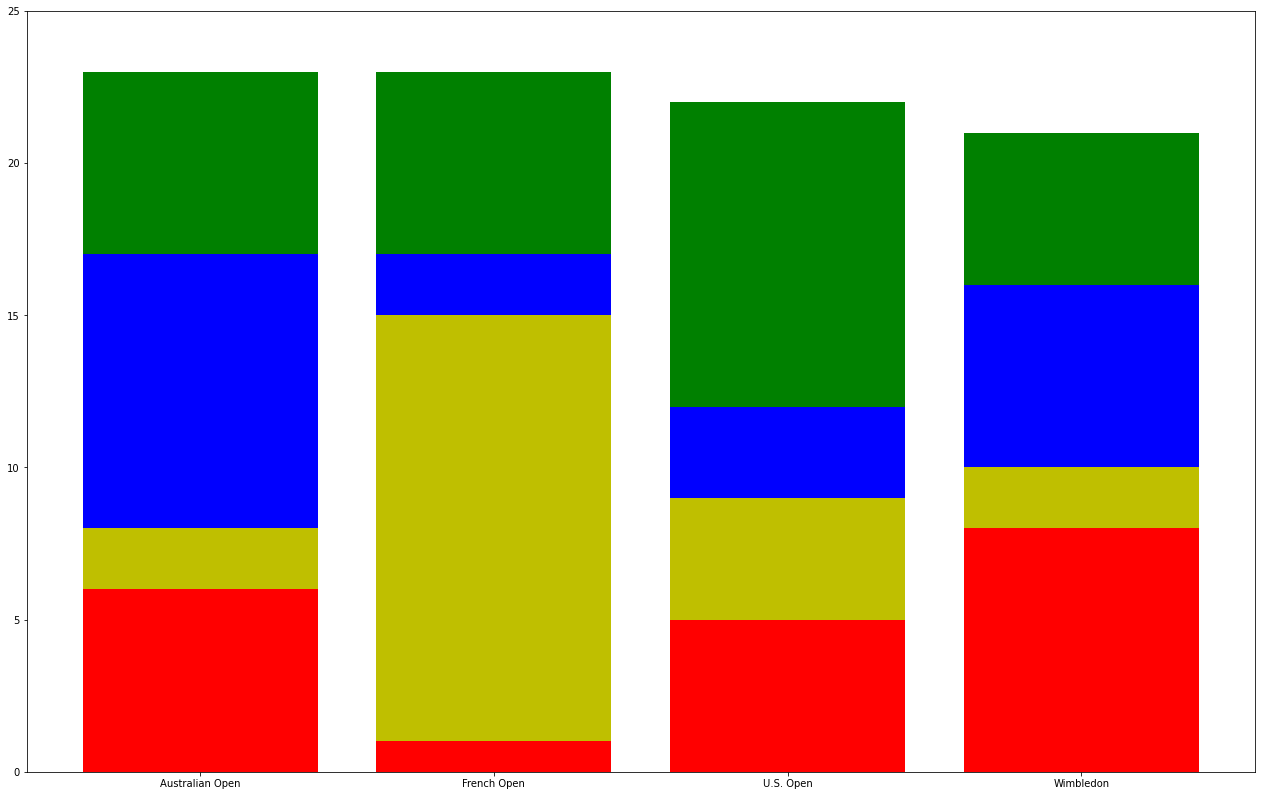

In [214]:
fig, ax = plt.subplots()

ax.set_ylim(top= 25)
ax.bar(roger["TOURNAMENT"], roger["GRAND SLAMS"], label="Roger Federer", color="r")
ax.bar(rafa["TOURNAMENT"], rafa["GRAND SLAMS"], label="Rafael Nadal", color="y", bottom=roger["GRAND SLAMS"])
ax.bar(novak["TOURNAMENT"], novak["GRAND SLAMS"], label="Novak Djokovic", color="b", bottom=fedal["GRAND SLAMS"])
ax.bar(other["TOURNAMENT"], other["GRAND SLAMS"], label="Other", color="g", bottom=fedanov["GRAND SLAMS"])


# ax.set_ylabel('Scores')
# ax.set_title('Scores by group and gender')
# ax.legend()

plt.show()


# VISUALIZACION FINAL (Google Drawings)
[link](https://docs.google.com/drawings/d/1FPEDASmw_DsKG4xjhvpqi8-RePCqd0-he8t28lXokxY/edit?usp=sharing)

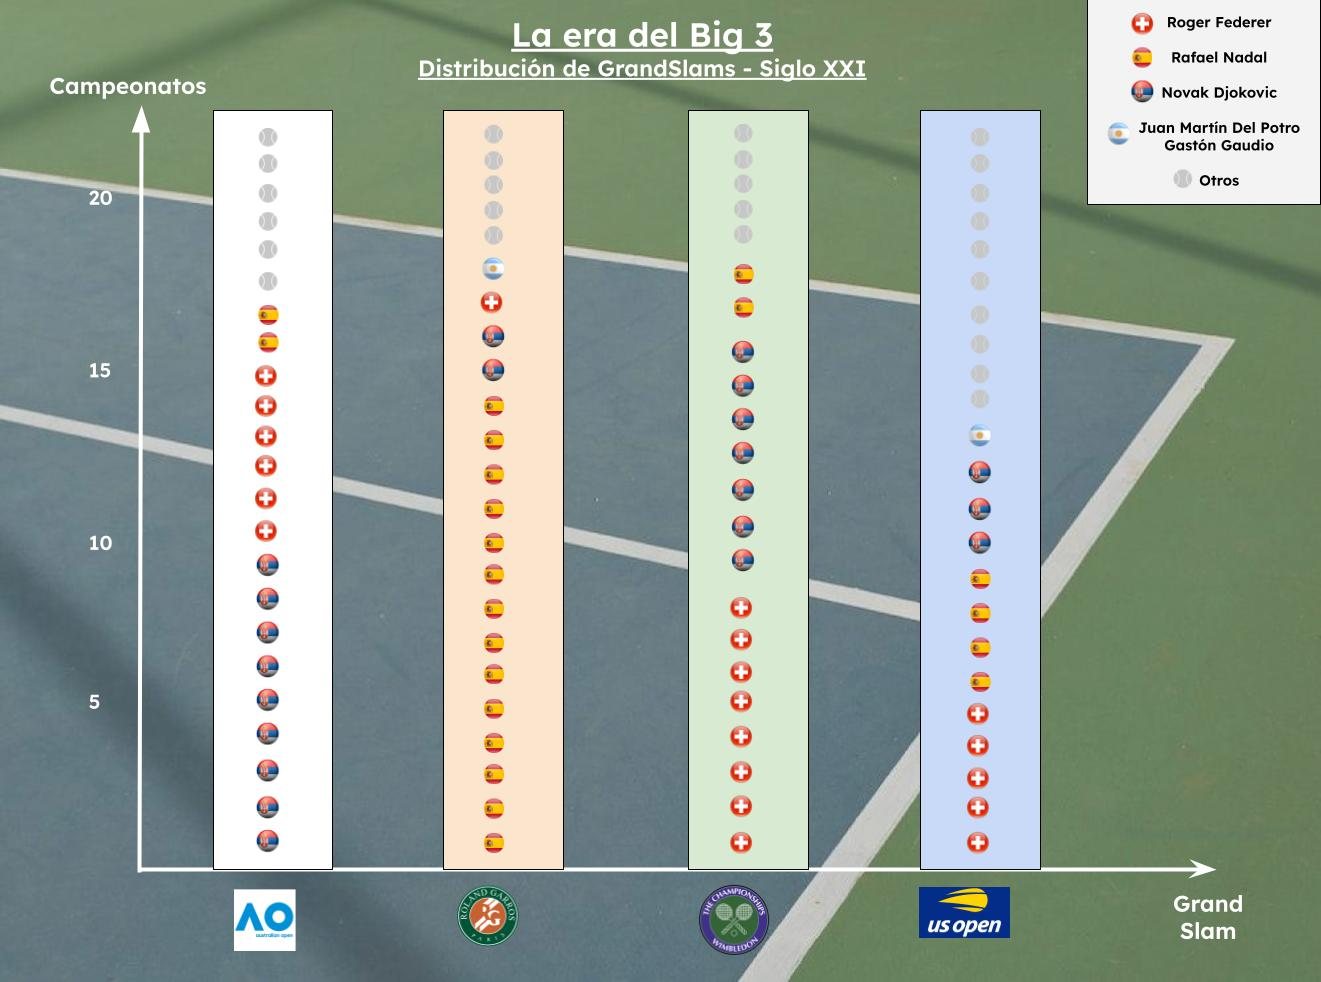